In [41]:
import pandas as pd

In [42]:
import os

In [43]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [44]:
img=cv2.imread('./img_dataset/maria_sharapova/tyj.jpg')

In [45]:
img.shape

(183, 275, 3)

(183, 275, 3)

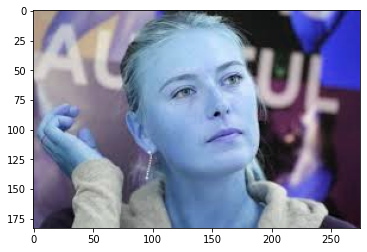

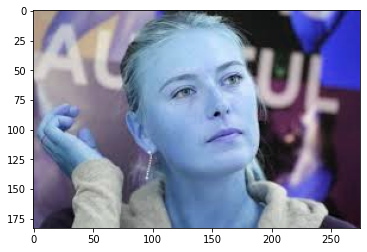

In [46]:
plt.imshow(img)

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [48]:
gray.shape

(183, 275)

(183, 275)

In [49]:
face_cascade = cv2.CascadeClassifier('.//haarcascade/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('.//haarcascade/haarcascade_eye.xml')

In [50]:
faces = face_cascade.detectMultiScale(gray, 1.1, 4)


In [51]:
for (x,y,h,w) in faces :
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

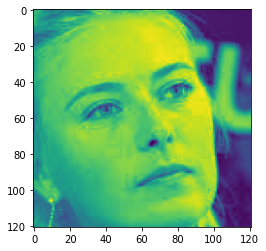

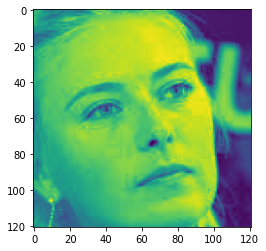

In [52]:
plt.imshow(roi_gray)

In [53]:
def crop_if_2_eye(image_path):
    img=cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>= 2:
                       return roi_color
    

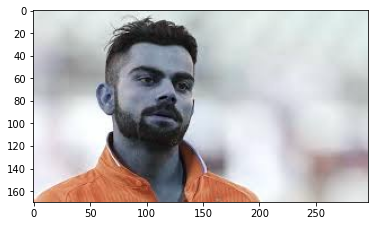

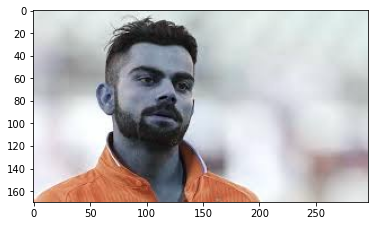

In [54]:
test=cv2.imread('./img_dataset/virat_kohli/kuu.jpg')
plt.imshow(test)

In [55]:
path_to_data = "./img_dataset/"
path_to_cr_data = "./img_dataset/cropped/"


img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    

In [56]:
img_dirs

['./img_dataset/cropped',
 './img_dataset/maria_sharapova',
 './img_dataset/rajkumar_roa',
 './img_dataset/virat_kohli']

['./img_dataset/cropped',
 './img_dataset/maria_sharapova',
 './img_dataset/rajkumar_roa',
 './img_dataset/virat_kohli']

In [57]:
celeb=[]
for img_dir in img_dirs:
    name=img_dir.split('/')[-1]
    celeb.append(name)

In [58]:
celeb

['cropped', 'maria_sharapova', 'rajkumar_roa', 'virat_kohli']

['cropped', 'maria_sharapova', 'rajkumar_roa', 'virat_kohli']

In [59]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [60]:
for img_dir in img_dirs:
    count=1  
    name=img_dir.split('/')[-1]
   
    for entry in os.scandir(img_dir):
        roi_color=crop_if_2_eye(entry.path)
        if roi_color is not None:
            crop_folder=path_to_cr_data + name 
            if not os.path.exists(crop_folder):
                 os.mkdir(crop_folder)
            print('generating')
            crop_file=name+str(count)+('.png')
            crop_file_path=crop_folder+('/')+crop_file
            cv2.imwrite(crop_file_path,roi_color)
            count += 1
        

generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generatinggenerating
generating
generating

generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generating
generatinggenerating
generating
generating
generating
generating

generating
generating
generating
generating
generating
generating
generating

In [147]:
from tensorflow.keras.layers import Input , Lambda , Dense, Flatten , Conv2D

In [148]:
from tensorflow.keras.applications.vgg19 import VGG19


In [149]:
from tensorflow.keras.models import Sequential

In [150]:
IMG_SIZE=[224, 224]
vgg=VGG19(input_shape=IMG_SIZE + [3],
         weights='imagenet',
        include_top=False
         )

In [151]:
for layer in vgg.layers:
    layer.trainable=False

In [152]:
x=Flatten()(vgg.output)

In [153]:
from tensorflow.keras.layers import Dense
pred = Dense(3, activation='softmax')(x)

In [154]:
from tensorflow.keras.models import Model
modelvgg=Model(inputs=vgg.input,outputs=pred)

In [155]:
modelvgg.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['acc']
)

In [156]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [157]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

In [158]:

test_datagen = ImageDataGenerator(rescale = 1./255)

In [159]:

training_set = train_datagen.flow_from_directory(path_to_cr_data,
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [160]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [161]:
test_set = test_datagen.flow_from_directory( './test',
                                                 target_size = (224, 224),
                                                 batch_size = 6,
                                                 class_mode = 'categorical')

Found 12 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [162]:
r=modelvgg.fit(
            training_set,
            validation_data=test_set,
            epochs=5)

C:\Users\Hp\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Hp\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Hp\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Hp\anaconda3\lib\site-packages\keras_preprocessing\image\image

Epoch 1/5
Epoch 1/5
18/18 [==============================] - 69s 4s/step - loss: 2.5918 - acc: 0.3323 - val_loss: 1.3834 - val_acc: 0.6667
Epoch 2/5
Epoch 2/5
18/18 [==============================] - 68s 4s/step - loss: 1.1838 - acc: 0.5678 - val_loss: 0.5127 - val_acc: 0.7500
Epoch 3/5
Epoch 3/5
18/18 [==============================] - 71s 4s/step - loss: 0.6829 - acc: 0.7056 - val_loss: 0.3076 - val_acc: 0.9167
Epoch 4/5
Epoch 4/5
18/18 [==============================] - 75s 4s/step - loss: 0.6133 - acc: 0.7536 - val_loss: 0.2407 - val_acc: 0.9167
Epoch 5/5
Epoch 5/5
18/18 [==============================] - 79s 4s/step - loss: 0.4821 - acc: 0.7885 - val_loss: 0.1533 - val_acc: 1.0000


In [163]:
y_pred=modelvgg.predict(test_set)

In [164]:
y_pred

array([[9.9995911e-01, 2.9460627e-05, 1.1417271e-05],
       [8.7269485e-01, 1.2143256e-01, 5.8726282e-03],
       [4.1634175e-03, 9.3195987e-01, 6.3876674e-02],
       [8.6444635e-03, 3.9248518e-03, 9.8743069e-01],
       [4.6516943e-01, 4.3595770e-01, 9.8872826e-02],
       [8.0977511e-01, 1.8218294e-01, 8.0419388e-03],
       [7.0763422e-06, 5.2293075e-05, 9.9994063e-01],
       [5.3430929e-05, 3.6682936e-04, 9.9957973e-01],
       [1.9924286e-01, 6.6594988e-01, 1.3480718e-01],
       [1.3635443e-02, 8.7052965e-01, 1.1583497e-01],
       [3.5969071e-02, 9.1537535e-01, 4.8655476e-02],
       [2.7188941e-04, 9.3127191e-03, 9.9041533e-01]], dtype=float32)

array([[9.9995911e-01, 2.9460627e-05, 1.1417271e-05],
       [8.7269485e-01, 1.2143256e-01, 5.8726282e-03],
       [4.1634175e-03, 9.3195987e-01, 6.3876674e-02],
       [8.6444635e-03, 3.9248518e-03, 9.8743069e-01],
       [4.6516943e-01, 4.3595770e-01, 9.8872826e-02],
       [8.0977511e-01, 1.8218294e-01, 8.0419388e-03],
       [7.0763422e-06, 5.2293075e-05, 9.9994063e-01],
       [5.3430929e-05, 3.6682936e-04, 9.9957973e-01],
       [1.9924286e-01, 6.6594988e-01, 1.3480718e-01],
       [1.3635443e-02, 8.7052965e-01, 1.1583497e-01],
       [3.5969071e-02, 9.1537535e-01, 4.8655476e-02],
       [2.7188941e-04, 9.3127191e-03, 9.9041533e-01]], dtype=float32)

In [165]:
y_pred=np.argmax(y_pred ,axis=1)

In [166]:
y_pred

array([0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2], dtype=int64)

array([0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2], dtype=int64)